In [14]:
%matplotlib notebook

import numpy as np
import rasterio as rio
from rasterio import plot 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from rasterio.plot import show


In [18]:
dataset16 = rio.open("D:\RS_Ulster\sub_16.tif")
dataset22 = rio.open("D:\RS_Ulster\sub_22.tif")

In [19]:
print(dataset16.meta)
dataset22.meta

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1187, 'height': 1006, 'count': 4, 'crs': CRS.from_epsg(32735), 'transform': Affine(10.0, 0.0, 576510.0,
       0.0, -10.0, 9890530.0)}


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1187,
 'height': 1006,
 'count': 4,
 'crs': CRS.from_epsg(32735),
 'transform': Affine(10.0, 0.0, 576510.0,
        0.0, -10.0, 9890530.0)}

In [36]:
img16 = dataset16.read()



In [21]:
img22 = dataset22.read()

In [24]:
img16.shape == img22.shape

True

In [23]:
img22.shape

(4, 1006, 1187)

In [37]:
np.max(img16, axis=(1, 2))

array([1922, 1843, 1920, 4708], dtype=uint16)

In [44]:
img16 = img16/10000
img16[1]

array([[5.94e-14, 5.70e-14, 5.05e-14, ..., 5.89e-14, 5.41e-14, 5.86e-14],
       [6.02e-14, 5.93e-14, 5.48e-14, ..., 5.51e-14, 5.49e-14, 5.71e-14],
       [6.10e-14, 5.81e-14, 5.19e-14, ..., 5.79e-14, 5.66e-14, 5.32e-14],
       ...,
       [6.25e-14, 6.19e-14, 6.38e-14, ..., 6.76e-14, 6.62e-14, 6.48e-14],
       [6.19e-14, 5.62e-14, 6.32e-14, ..., 6.12e-14, 6.31e-14, 6.62e-14],
       [6.05e-14, 5.74e-14, 6.46e-14, ..., 6.58e-14, 6.52e-14, 6.61e-14]])

In [48]:
img22 = img22/10000

In [51]:
diff_nir = img22[3] - img16[3]

In [66]:
ndvi16 = (img16[3]-img16[2]) / (img16[3] + img16[2])
ndvi22 = (img22[3]-img22[2]) / (img22[3] + img22[2])


In [76]:
ndvi_diff = ndvi16 - ndvi22

In [62]:
dataset16.bounds

BoundingBox(left=576510.0, bottom=9880470.0, right=588380.0, top=9890530.0)

<IPython.core.display.Javascript object>


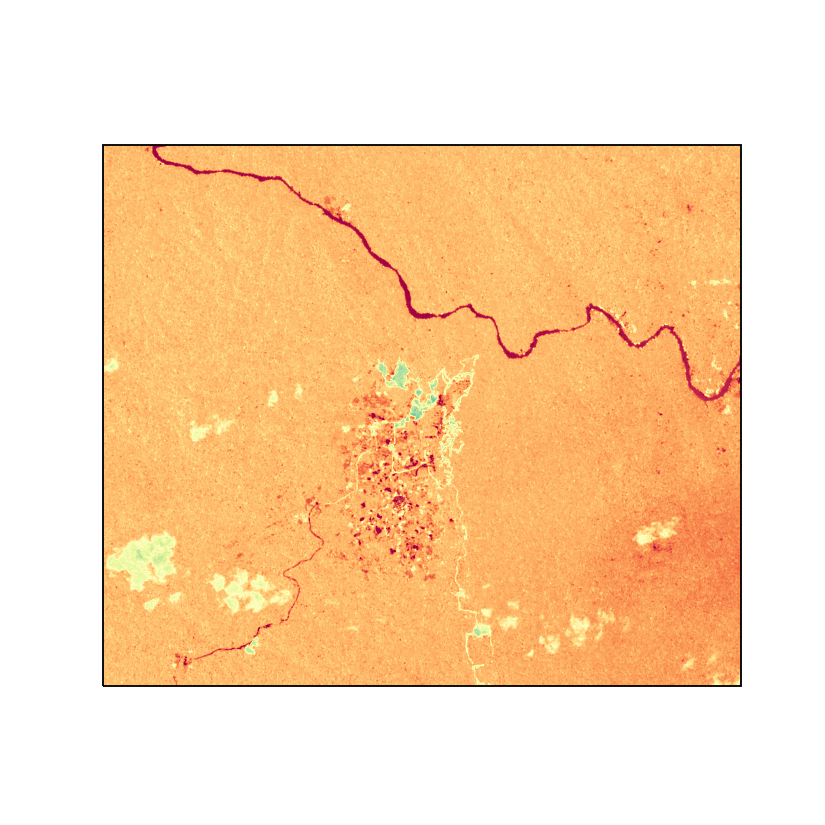

In [77]:
myCRS = ccrs.UTM(35) # note that this matches with the CRS of our image
xmin, ymin, xmax, ymax = dataset22.bounds 
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection=myCRS))
ax.imshow(ndvi_diff, cmap="Spectral",vmin=0, vmax=1, transform=myCRS, extent=[xmin, xmax, ymin, ymax]) 
